<a href="https://colab.research.google.com/github/Shrayansh19/Bike_Rentals_Forecast/blob/main/Bike_Rentals_Forecast_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

Loading the Dataset

In [20]:
from pandas import read_csv
filePath = '/content/bikes.csv'
bikesData = pd.read_csv(filePath)
print(bikesData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [21]:
bikesData.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [22]:
columnsToDrop = ['instant','casual','registered','atemp','dteday']

bikesData = bikesData.drop(columnsToDrop,1)

In [23]:
bikesData.head(3)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32


In [24]:
np.random.seed(42)
from sklearn.model_selection import train_test_split

bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)

print(len(train_set), "train +", len(test_set), "test")

train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)

12165 train + 5214 test


In [25]:
columnsToScale = ['temp','hum','windspeed']

scaler = StandardScaler()

train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])
train_set[columnsToScale].describe()


,temp,hum,windspeed
count,1.216500e+04,1.216500e+04,1.216500e+04
mean,1.658955e-15,4.775031e-17,-1.367550e-15
std,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.476000e+00,-3.245965e+00,-1.552670e+00
25%,-8.186290e-01,-7.628859e-01,-6.962541e-01
50%,1.005628e-02,1.307622e-02,-2.069907e-01
75%,8.387416e-01,8.407692e-01,5.264946e-01
max,2.599698e+00,1.927116e+00,5.419128e+00


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor

trainingCols = train_set.drop(['cnt'], axis=1)
trainingLabels = train_set['cnt']

In [27]:
#Train a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor(random_state = 42)

In [28]:

dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
print(dt_mae_scores)
print('\n')
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
print(dt_mse_scores)

[42.94494659 50.37222679 36.95891537 44.26211997 46.99589154 71.98026316
 58.19901316 48.87417763 50.84868421 96.46217105]


[ 65.39786583  77.67402864  60.57274567  73.73250527  75.48574011
 113.22922285  96.5884429   82.11639785  86.86752618 149.13680359]


In [29]:
lin_reg = LinearRegression()

lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")

print(lr_mae_scores)
print('\n')

lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))

print(lr_mse_scores)

[ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]


[ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]


In [30]:
forest_reg = RandomForestRegressor(n_estimators=150, random_state=42)
rf_mae_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")

print(rf_mae_scores)

rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))

print(rf_mse_scores)

[33.39666393 33.54451931 28.50225692 31.78826623 36.55658724 57.81963268
 40.96405702 40.84652961 37.57766447 84.69771382]
[ 45.64176074  50.97205843  43.37588352  52.2640926   60.46557726
  94.24478873  66.26045287  65.45672124  61.69916554 131.9727285 ]


In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # combinations of hyperparameters
    {'n_estimators': [120, 150], 'max_features': [10, 12], 'max_depth': [15, 28]},
]

In [32]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [33]:
grid_search.fit(trainingCols, trainingLabels)

print(grid_search.best_estimator_)
print(grid_search.best_params_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
{'max_depth': 28, 'max_features': 10, 'n_estimators': 150}


In [34]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[0.00424888 0.00145493 0.00570279 0.58348648 0.00215107 0.01790669
 0.06993018 0.01688336 0.09373438 0.03176755 0.00907719 0.16365649]


In [35]:
final_model = grid_search.best_estimator_
test_set.sort_values('dayCount', axis= 0, inplace=True)
test_x_cols = (test_set.drop(['cnt'], axis=1)).columns.values
test_y_cols = 'cnt'

X_test = test_set.loc[:,test_x_cols]
y_test = test_set.loc[:,test_y_cols]

39.47930005837265


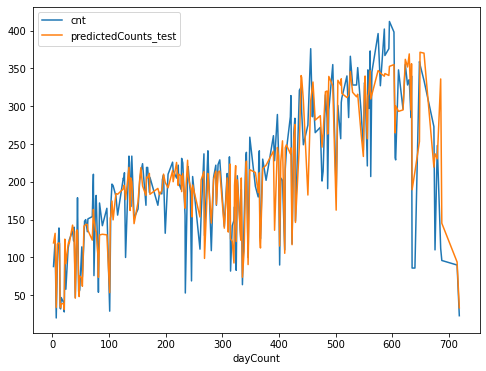

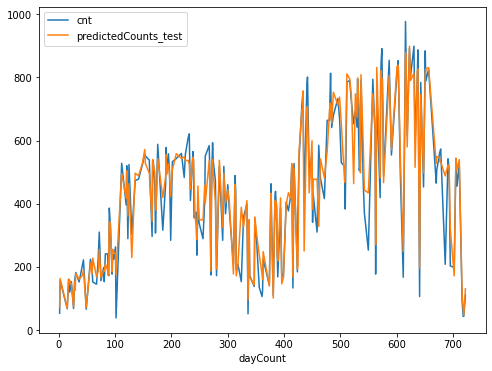

In [36]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])
final_mse = np.sqrt(mse)
print(final_mse)
test_set.describe()
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()